# Univariate Linear Regression

### Load the Data And Libraries

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [4]:
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Visualize the Data

Text(0.5, 1.0, "Profit in 10000's vs City Population in 10000's")

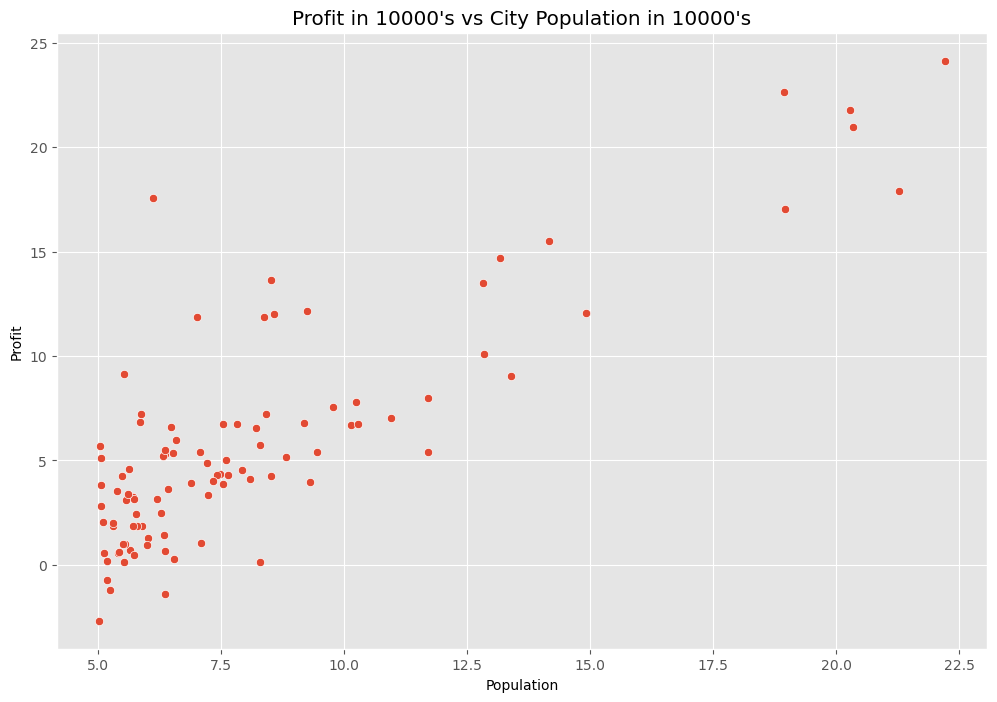

In [7]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Profit in 10000's vs City Population in 10000's")

### Compute the Cost 𝐽(𝜃)

    𝐽(𝜃) = 1/ 2m summation m\i=1 (h 𝜃(x^i) - y^i)**2

where,

    h𝜃(x) = 𝜃^T x = (𝜃)0 + (𝜃)1x1

In [10]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y)**2

    return 1/(2*m) * np.sum(error)

In [17]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)                 # for column -> axis = 1
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))

cost_function(X, y, theta)

32.072733877455676

### Gradient Descent

Minimise the cost function J(𝜃) by updating the below equation and repeat until convergence.

    (𝜃)j := (𝜃)j - alpha 1/m summation m\i=1 (h(𝜃)x^i - y^i)(x)j^i


(simultaneously update (𝜃)j for all j)

In [18]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))

    return theta, costs

In [19]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)), str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


### Visualising the Cost Function J(𝜃)

In [ ]:
from mpl_toolkits.mplot3d import Axes3d

In [23]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)

Text(0, 0.5, '$\\Theta_1$')

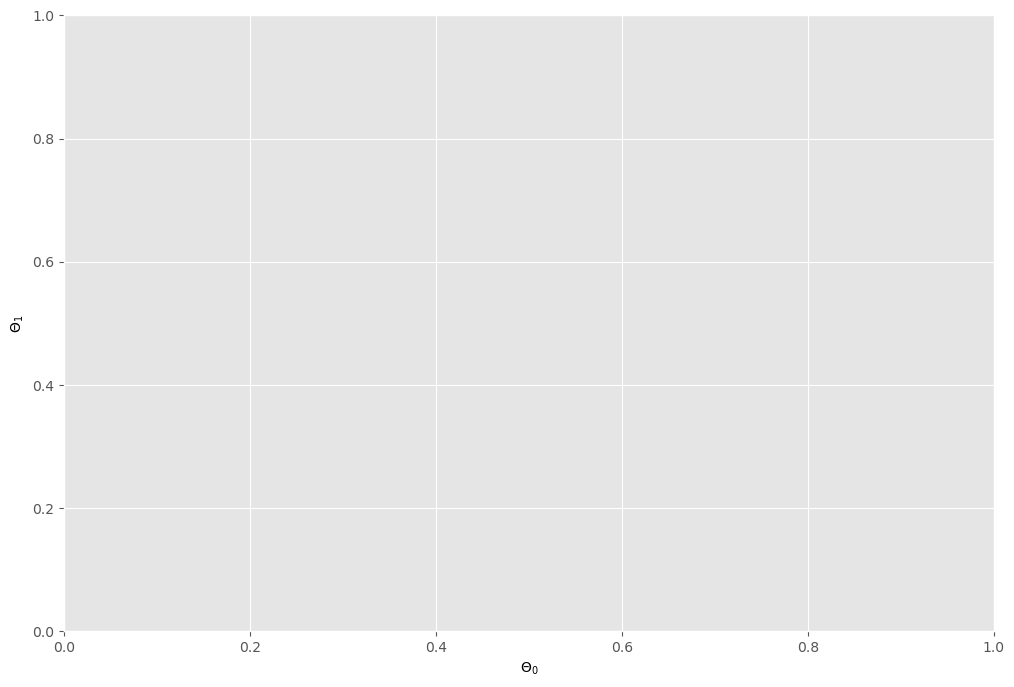

In [32]:
fig = plt.figure(figsize = (12, 8))
# ax = fig.gca(projection = '3d')

# surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
# ax.set_zlabel("$J(\Theta)$")
# ax.view_init(30, 330)

### Plotting the Convergence

Plot J(𝜃) againt the numebr of iteration of gradient descent.

Text(0.5, 1.0, 'Values of the Cost Function over Iterations of Gradient Descent')

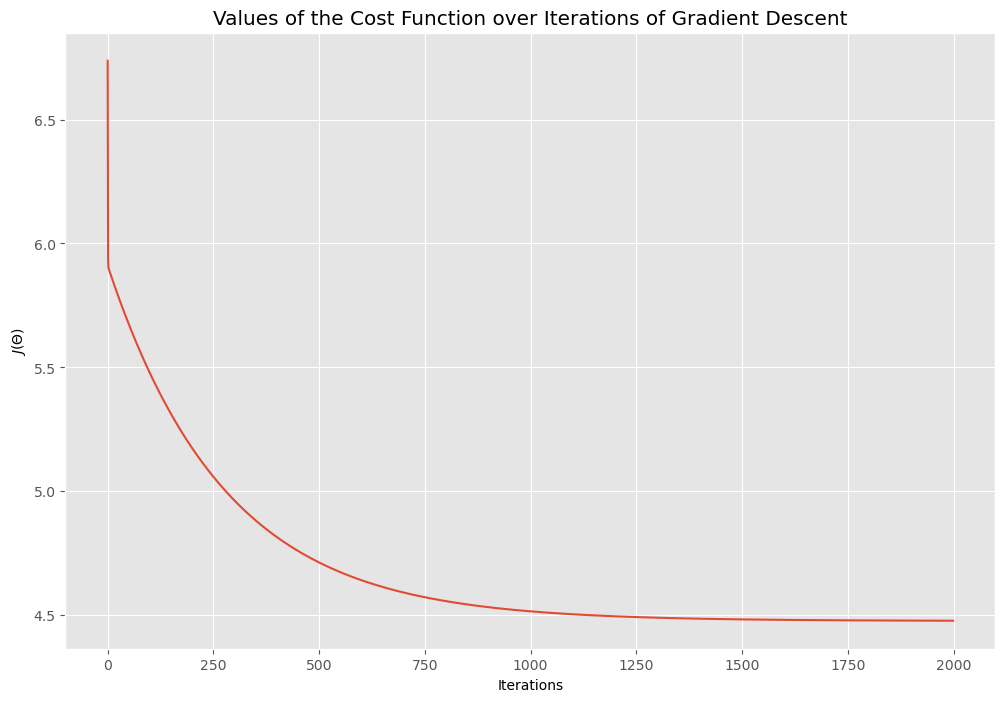

In [27]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over Iterations of Gradient Descent")

### Training Data with Linear Regression Fit

In [34]:
theta.shape

(2, 1)

In [35]:
theta                            # Since this is not going to work during Matrix Multiplication, so we need to squeeze out this Extra Dimension

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear Regression Fit')

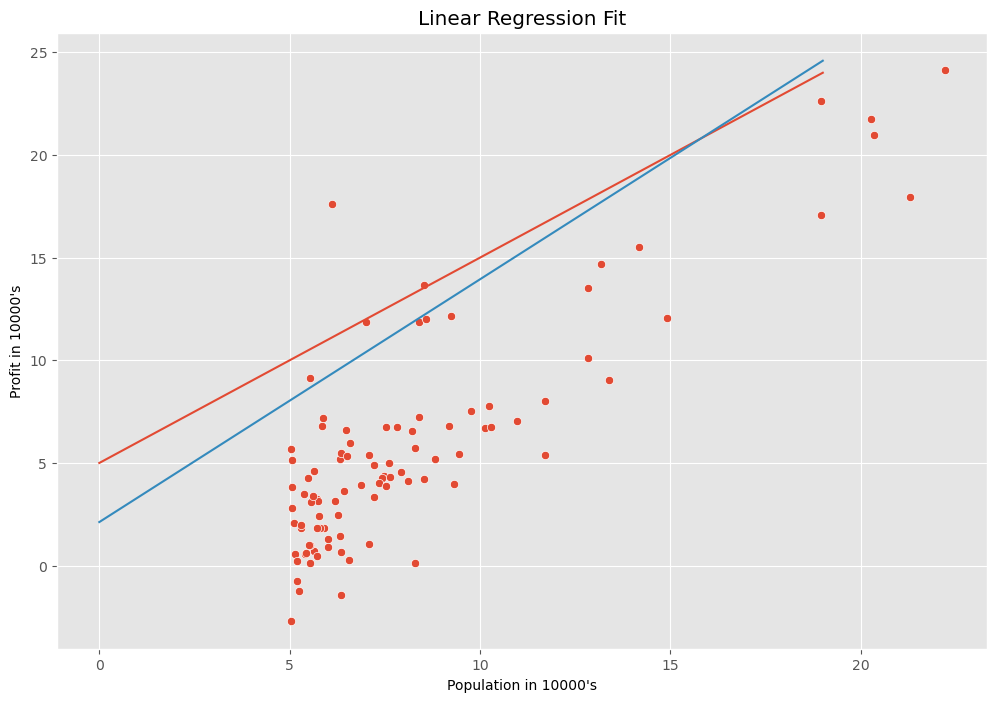

In [40]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value)
sns.lineplot(y_value)

plt.xlabel("Population in 10000's")
plt.ylabel("Profit in 10000's")
plt.title("Linear Regression Fit")

Text(0.5, 1.0, 'Linear Regression Fit')

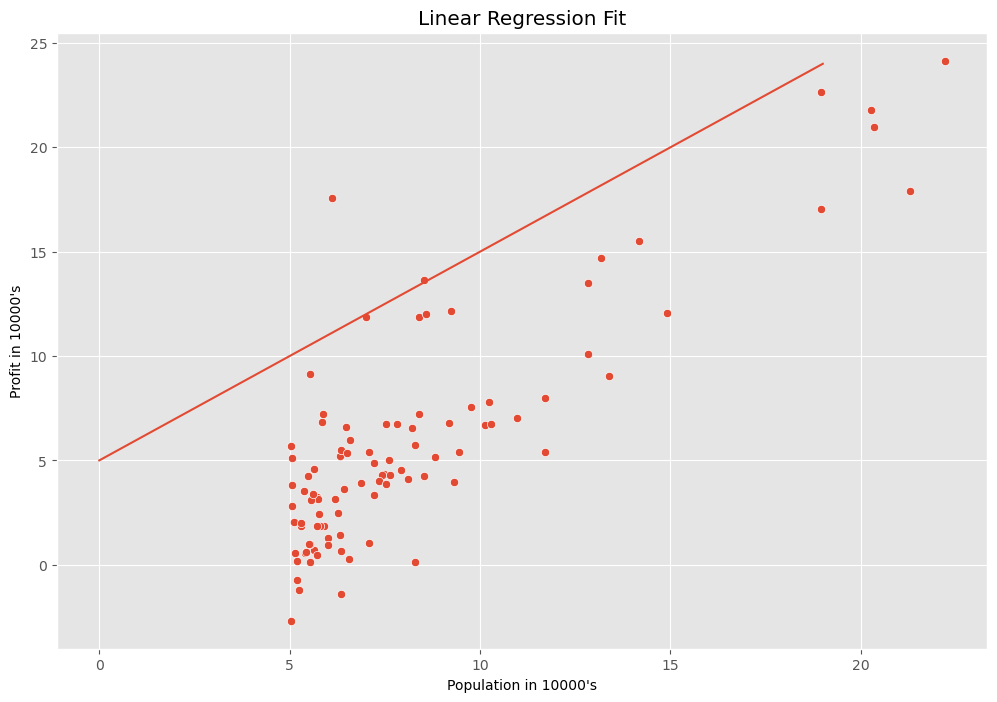

In [42]:
theta = np.squeeze(theta)
sns.scatterplot(x="Population", y="Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value)

plt.xlabel("Population in 10000's")
plt.ylabel("Profit in 10000's")
plt.title("Linear Regression Fit")

### Inference using the optimized 𝜃 values
    h𝜃(x) = 𝜃^T x

In [44]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [47]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print("For a Population of 40,000 people, The model predicts a profit of " + str(round(y_pred_1, 0)) + " rupees")

For a Population of 40,000 people, The model predicts a profit of 9408.0 rupees


In [51]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a Population of 83,000 people, The model predicts a profit of " + str(round(y_pred_2, 0)) + " rupees")

For a Population of 83,000 people, The model predicts a profit of 60243.0 rupees
